# Simple Linear Regression in TensorFlow 2.0

We will explore the learning concept of machine learning with a simple linear regression model.

In [1]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## x_data

We have assigned a total of 41 integers to `x_data`, **from -20 to 20**.

In [2]:
x_data = list(range(-20,21))

## y_data

Let's create `y_data` that satisfies the linear function relationship with `x_data`. However, let's mix the noise into `y_data` so that the algorithm cannot find the **slope** and **intercept** easily.

### Make noises

We created noises that follow a **normal distribution** with a **mu of 0** and **a sigma of 20**. The number of noises is equal to the number of `x_data`.

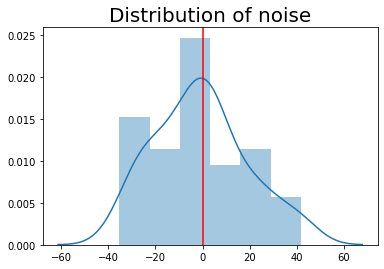

In [3]:
np.random.seed(2020)

mu = 0
sigma = 20
n = len(x_data)

noises = np.random.normal(mu, sigma, n)

plt.title('Distribution of noise', size=20)
sns.distplot(noises)
plt.axvline(0, color='r')
plt.show()

### y_data

$$
{f(x)} = {3x-3}
$$

We will create `y_temp` with a slope of 3 and an intercept of -3.

In [4]:
W_answer = 3
b_answer = -3

y_temp = list(np.array(x_data)*W_answer + b_answer)

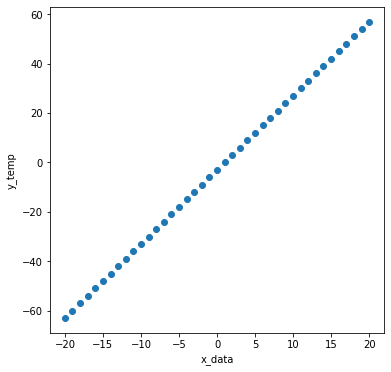

In [5]:
plt.figure(figsize=(6,6))
plt.scatter(x_data, y_temp)
plt.xlabel('x_data')
plt.ylabel('y_temp')
plt.show()

Let's mix the noise into the straight line created above.

In [6]:
y_data = list(np.array(y_temp) + np.array(noises))

Isn't it easy for the algorithm to find the actual slope and intercept?

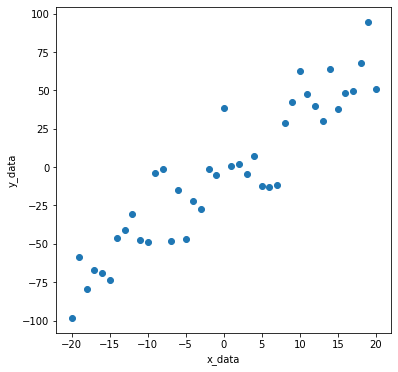

In [7]:
plt.figure(figsize=(6,6))
plt.scatter(x_data, y_data)
plt.xlabel('x_data')
plt.ylabel('y_data')
plt.show()

## Initializing Weights


In machine learning, the slopes and intercepts of the functions to look for are called Weight and Bias. And these values are initially unknown to the algorithm. That's why we initialize it to a random value. The slope, that is, Weight, is set to -0.5, and the intercept, Bias, is also set to -0.5.

In [8]:
W = tf.Variable(-0.5)
b = tf.Variable(-0.5)

## Set Learning Rate

`learning_rate` is a value that indicates how much to learn when the algorithm searches for weight and bias. Typically, you set this value to a very small value. Set it to 0.001 here.

In [9]:
learning_rate = 0.001

## Training the model

We tried to find the weight and bias using TensorFlow as shown below. The red line starts out in the wrong place at first, but you will notice that the line changes to the correct position as algorithm learn. 

After a total of 1000 learning, we predict that W is about 3.6 and b is about -3.4. This is close to the actual value. Isn't it amazing?

#0 	 W: 0.65633726 	 b: -0.50679857 	 Cost: 2717.1902


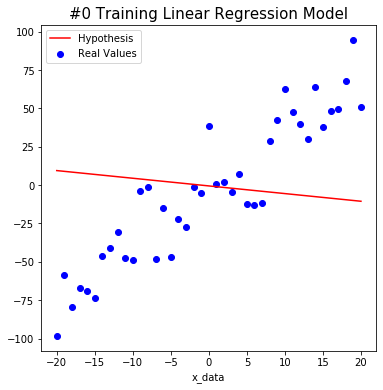



#200 	 W: 3.6297755 	 b: -1.6261454 	 Cost: 323.1163


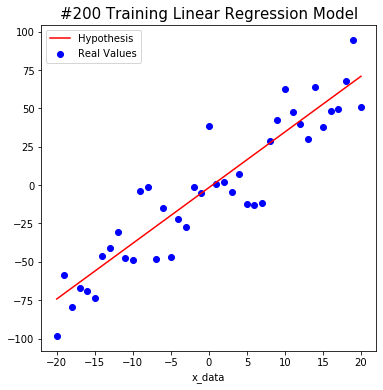



#400 	 W: 3.6297755 	 b: -2.376165 	 Cost: 320.25763


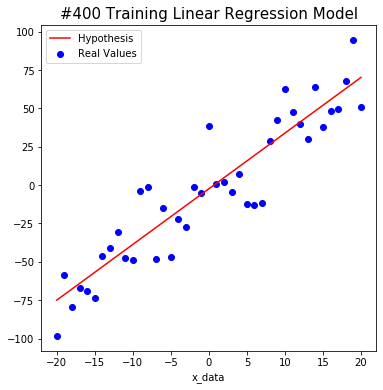



#600 	 W: 3.6297755 	 b: -2.8787198 	 Cost: 318.97412


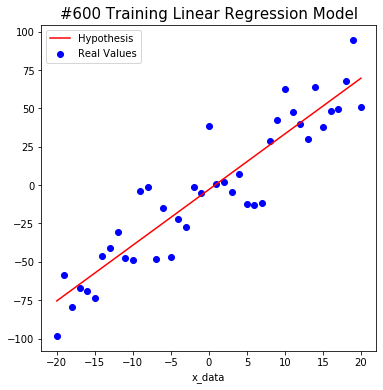



#800 	 W: 3.6297755 	 b: -3.215457 	 Cost: 318.3979


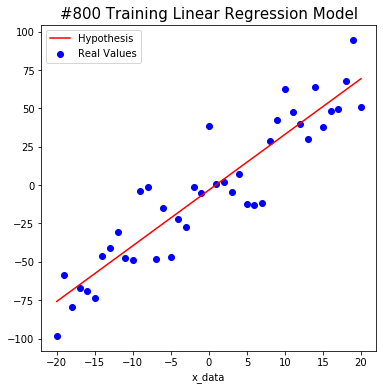



#1000 	 W: 3.6297755 	 b: -3.4410856 	 Cost: 318.1392


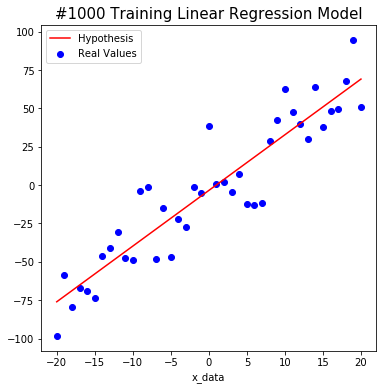

In [10]:
cost_list=[]

# Train
for i in range(1000+1):
    
    # Gradient Descent
    with tf.GradientTape() as tape:
        
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    
        # Update
        W_grad, b_grad = tape.gradient(cost, [W, b])
        W.assign_sub(learning_rate * W_grad)
        b.assign_sub(learning_rate * b_grad)
        cost_list.append(cost.numpy())
    
    # Output
    if i % 200 == 0:
        
        print("#%s \t W: %s \t b: %s \t Cost: %s" % (i, W.numpy(), b.numpy(), cost.numpy()))
        
        plt.figure(figsize=(6,6))
        plt.title('#%s Training Linear Regression Model' % i, size=15)
        plt.scatter(x_data, y_data, color='blue', label='Real Values')
        plt.plot(x_data, hypothesis, color='red', label='Hypothesis')
        plt.xlabel('x_data')
        plt.legend(loc='upper left')
        plt.show()
        
        print('\n')
        

The yellow line represents the change in cost values ​​that represents the difference between the actual value and the predicted value in the model.

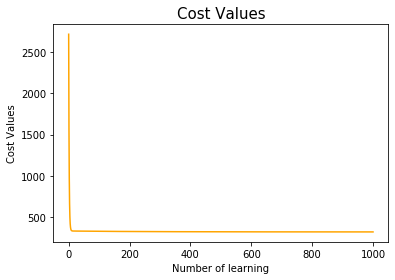

In [11]:
plt.title('Cost Values', size=15)
plt.plot(cost_list, color='orange')
plt.xlabel('Number of learning')
plt.ylabel('Cost Values')
plt.show()

The following shows how the model trains on non-noise data.

## Initializing Weights

In [12]:
W = tf.Variable(-0.5)
b = tf.Variable(-0.5)

## Set Learning Rate

In [13]:
learning_rate = 0.001

## Training the model

#0 	 W: 0.4799999 	 b: -0.505 	 Cost: 1721.25


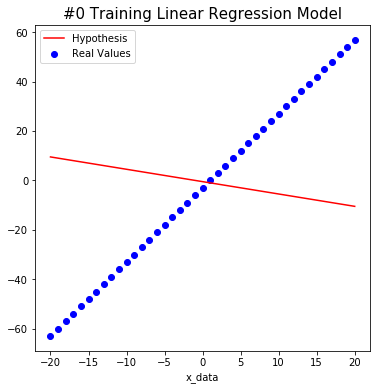



#200 	 W: 2.9999998 	 b: -1.3282211 	 Cost: 2.806057


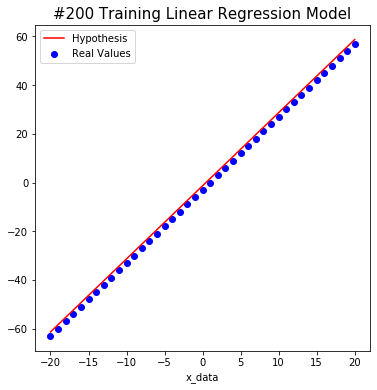



#400 	 W: 2.9999998 	 b: -1.8798214 	 Cost: 1.2598358


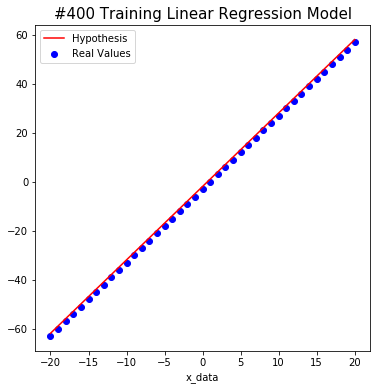



#600 	 W: 2.9999998 	 b: -2.2494214 	 Cost: 0.5656284


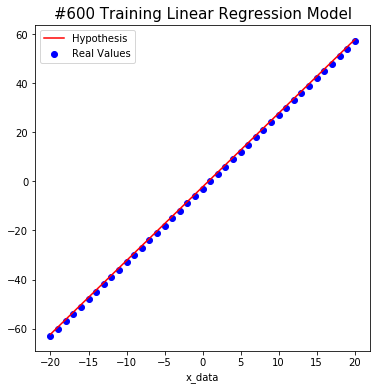



#800 	 W: 2.9999998 	 b: -2.497073 	 Cost: 0.25394946


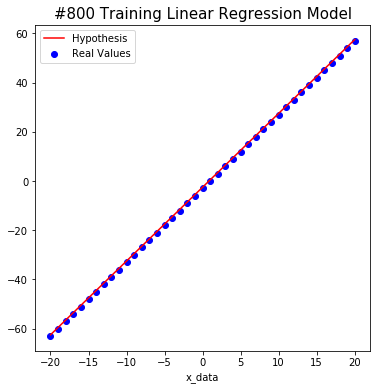



#1000 	 W: 2.9999998 	 b: -2.6630127 	 Cost: 0.114015914


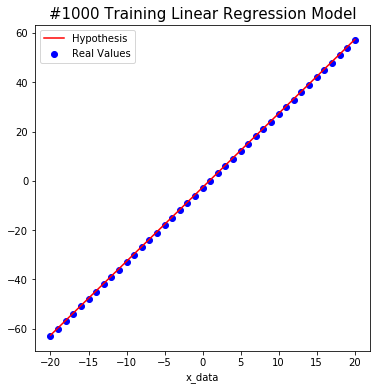

In [14]:
cost_list=[]

# Train
for i in range(1000+1):
    
    # Gradient Descent
    with tf.GradientTape() as tape:
        
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_temp))
    
    # Update
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    cost_list.append(cost.numpy())
    
    # Output
    if i % 200 == 0:
        
        print("#%s \t W: %s \t b: %s \t Cost: %s" % (i, W.numpy(), b.numpy(), cost.numpy()))
        
        plt.figure(figsize=(6,6))
        plt.title('#%s Training Linear Regression Model' % i, size=15)
        plt.scatter(x_data, y_temp, color='blue', label='Real Values')
        plt.plot(x_data, hypothesis, color='red', label='Hypothesis')
        plt.xlabel('x_data')
        plt.legend(loc='upper left')
        plt.show()
        
        print('\n')
        

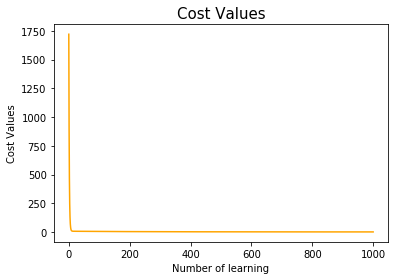

In [15]:
plt.title('Cost Values', size=15)
plt.plot(cost_list, color='orange')
plt.xlabel('Number of learning')
plt.ylabel('Cost Values')
plt.show()